In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset_train=pd.read_csv('/content/NSE-TATAGLOBAL.csv')

In [3]:
training_set=dataset_train.iloc[:,1:2].values

In [4]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
dataset_train.shape

(2035, 8)

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [7]:
X_train=[]
y_train=[]
for i in range (60,2035):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [8]:
X_train.shape

(1975, 60)

In [9]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [10]:
# Let's build the RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
input_shape=(X_train.shape[1],1)

In [12]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units=50))
#regressor.add(Dropout(0.2))

In [16]:
regressor.add(Dense(units=1))
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0183
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0037
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0037
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0034
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0022
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0021
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017


In [19]:
dataset_test=pd.read_csv('/content/tatatest.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

In [20]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [21]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [22]:
len(inputs)

76

In [23]:
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,76):
  X_test.append(inputs[i-60:i,0])

In [24]:
len(X_test)

16

In [25]:
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


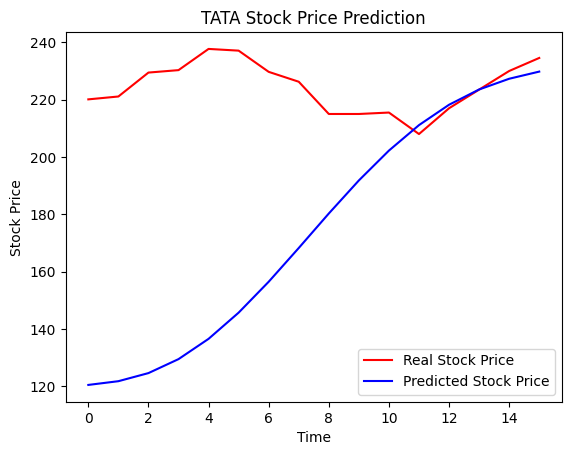

In [26]:
plt.plot(real_stock_price,color='red',label='Real Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()